# Week 9 (Mon) - Introduction to Numpy 2 & Plotting Intro

Python lists:

* are very flexible
* don't require uniform numerical types
* are very easy to modify (inserting or appending objects).

However, flexibility often comes at the cost of performance, and lists are not the ideal object for numerical calculations.

This is where **Numpy** comes in. Numpy is a Python module that defines a powerful n-dimensional array object that uses C and Fortran code behind the scenes to provide high performance.

The downside of Numpy arrays is that they have a more rigid structure, and require a single numerical type (e.g. floating point values), but for a lot of scientific work, this is exactly what is needed.

The Numpy module is imported with:

In [1]:
import numpy

Although in the rest of this course, and in many packages, the following convention is used:

In [2]:
import numpy as np

This is because Numpy is so often used that it is shorter to type ``np`` than ``numpy``.

A very useful function in Numpy is [numpy.loadtxt](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) which makes it easy to read in data from column-based data. 


For example, we can either read it in using a single multi-dimensional array given the following file:

In [30]:
data = np.loadtxt('columns.txt')
data

array([[ 1.99500274e+03,  9.44444000e-01],
       [ 1.99500548e+03, -1.61111000e+00],
       [ 1.99500821e+03, -3.55556000e+00],
       [ 1.99501095e+03, -9.83333000e+00],
       [ 1.99501369e+03, -1.02222000e+01],
       [ 1.99501643e+03, -9.50000000e+00],
       [ 1.99501916e+03, -1.02222000e+01],
       [ 1.99502190e+03, -6.61111000e+00],
       [ 1.99502464e+03, -2.94444000e+00],
       [ 1.99502738e+03,  1.55556000e+00],
       [ 1.99503012e+03,  2.77778000e-01],
       [ 1.99503285e+03, -1.44444000e+00],
       [ 1.99503559e+03, -3.61111000e+00]])

Or we can read the individual columns:

In [31]:
date, temperature = np.loadtxt('columns.txt', unpack=True)

In [32]:
date

array([1995.00274, 1995.00548, 1995.00821, 1995.01095, 1995.01369,
       1995.01643, 1995.01916, 1995.0219 , 1995.02464, 1995.02738,
       1995.03012, 1995.03285, 1995.03559])

In [33]:
temperature

array([  0.944444,  -1.61111 ,  -3.55556 ,  -9.83333 , -10.2222  ,
        -9.5     , -10.2222  ,  -6.61111 ,  -2.94444 ,   1.55556 ,
         0.277778,  -1.44444 ,  -3.61111 ])

There are additional options to skip header rows, ignore comments, and read only certain columns. See the documentation for more details.

## Masking

The index notation ``[...]`` is not limited to single element indexing, or multiple element slicing, but one can also pass a discrete list/array of indices:

In [9]:
x = np.array([1,6,4,7,9,3,1,5,6,7,3,4,4,3])
x[[1,2,4,3,3,2]]

array([6, 4, 9, 7, 7, 4])

which is returning a new array composed of elements 1, 2, 4, etc from the original array.

Alternatively, one can also pass a boolean array of ``True/False`` values, called a **mask**, indicating which items to keep:

In [10]:
x[np.array([True, False, False, True, True, True, False, False, True, True, True, False, False, True])]

array([1, 7, 9, 3, 6, 7, 3, 3])

Now this doesn't look very useful because it is very verbose, but now consider that carrying out a comparison with the array will return such a boolean array:

In [11]:
x > 3.4

array([False,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True, False])

It is therefore possible to extract subsets from an array using the following simple notation:

In [12]:
x[x > 3.4]

array([6, 4, 7, 9, 5, 6, 7, 4, 4])

Conditions can be combined:

In [13]:
x[(x > 3.4) & (x < 5.5)]

array([4, 5, 4, 4])

Of course, the boolean **mask** can be derived from a different array to ``x`` as long as it is the right size:

In [14]:
x = np.linspace(-1., 1., 14)
y = np.array([1,6,4,7,9,3,1,5,6,7,3,4,4,3])

In [15]:
y[(x > -0.5) & (x < 0.4)]

array([9, 3, 1, 5, 6, 7])

Since the mask itself is an array, it can be stored in a variable and used as a mask for different arrays:

In [16]:
keep = (x > -0.5) & (x < 0.4)
x_new = x[keep]
y_new = y[keep]

In [17]:
x_new

array([-0.38461538, -0.23076923, -0.07692308,  0.07692308,  0.23076923,
        0.38461538])

In [18]:
y_new

array([9, 3, 1, 5, 6, 7])

A mask can also appear on the left hand side of an assignment:

In [19]:
y[y > 5] = 0.

In [20]:
y

array([1, 0, 4, 0, 0, 3, 1, 5, 0, 0, 3, 4, 4, 3])

## Exercise 1

The [data/munich_temperatures_average_with_bad_data.txt](data/munich_temperatures_average_with_bad_data.txt) data file gives the temperature in Munich every day for several years:

In [21]:
!head munich_temperatures_average_with_bad_data.txt  # shows the 10 first lines of a file

1995.00274 0.944444
1995.00548 -1.61111
1995.00821 -3.55556
1995.01095 -9.83333
1995.01369 -10.2222
1995.01643 -9.5
1995.01916 -10.2222
1995.02190 -6.61111
1995.02464 -2.94444
1995.02738 1.55556


Read in the file using ``np.loadtxt``. The data contains bad values, which you can identify by looking at the minimum and maximum values of the array. Use masking to get rid of the bad temperature values.

In [39]:
date, temperature = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack = True)
# different method separation
data = np.genfromtxt("munich_temperatures_average_with_bad_data.txt")
Date = data[:,0]
Temp = data[:,1]
keep = (x > -90) & (x < 90)

In [40]:
print(np.max(temperature), np.min(temperature))

99.0 -99.0


In [41]:
Temp

array([ 0.944444, -1.61111 , -3.55556 , ..., 10.5556  ,  8.94444 ,
       11.1667  ])

In [43]:
Date

array([1995.00274, 1995.00548, 1995.00821, ..., 2013.27926, 2013.282  ,
       2013.28474])

In [44]:
len(Date)

6679

In [70]:
x = Temp
x_new = x[keep]
x_new

y = Date
y_new = y[keep]
y_new

print(np.min(x_new), np.max(x_new))

len(y_new)

-16.7778 27.6667


6619

 NaN values

In arrays, some of the values are sometimes NaN - meaning *Not a Number*. If you multiply a NaN value by another value, you get NaN, and if there are any NaN values in a summation, the total result will be NaN. One way to get around this is to use ``np.nansum`` instead of ``np.sum`` in order to find the sum:

In [59]:
x = np.array([1,2,3,np.nan])

In [60]:
np.nansum(x)

np.float64(6.0)

In [61]:
np.nanmax(x)

np.float64(3.0)

You can also use ``np.isnan`` to tell you where values are NaN. For example, ``array[~np.isnan(array)]`` will return all the values that are not NaN (because ~ means 'not'):

In [62]:
np.isnan(x)

array([False, False, False,  True])

In [63]:
x[np.isnan(x)]

array([nan])

In [64]:
x[~np.isnan(x)]

array([1., 2., 3.])

## Exercise 2

The [data/munich_temperatures_average_with_bad_data_nan.txt](data/munich_temperatures_average_with_bad_data_nan.txt) data file gives the temperature in Munich every day for several years:

In [65]:
!head munich_temperatures_average_with_bad_data_nan.txt  # shows the 10 first lines of a file

1995.00274 0.944444
1995.00548 -1.61111
1995.00821 -3.55556
1995.01095 -9.83333
1995.01369 -10.2222
1995.01643 nan
1995.01916 -10.2222
1995.02190 -6.61111
1995.02464 -2.94444
1995.02738 1.55556


The data contains bad values AND nans! Use masking to get rid of the bad temperature values.

In [74]:
date, temperature = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack = True)
Date = data[:,0]
Temp = data[:,1]
keep = (x > -90) & (x < 90)

x = Temp
x_new = x[keep]
x_new

y = Date
y_new = y[keep]
y_new

print(np.min(x_new), np.max(x_new))
len(y_new)

-16.7778 27.6667


6607

## Plotting data is one of the easiest way to determine if something may be odd/wonrg with your data.  

Also visuallying data is a key way to help interpret things in science (__e.g., a picture is worth a thousand words, especially when your data is 100,000+ data points!__). 

In [66]:
# Import the needed fuctions
from matplotlib import pyplot as plt 
#matplotlib.pyplot is the standard for making plots and is derived from Matlab
import numpy as np

### Now lets plot our data to see if we got all of the outliers!!!  YAY WE GET TO FINALLY MAKE PLOTS!

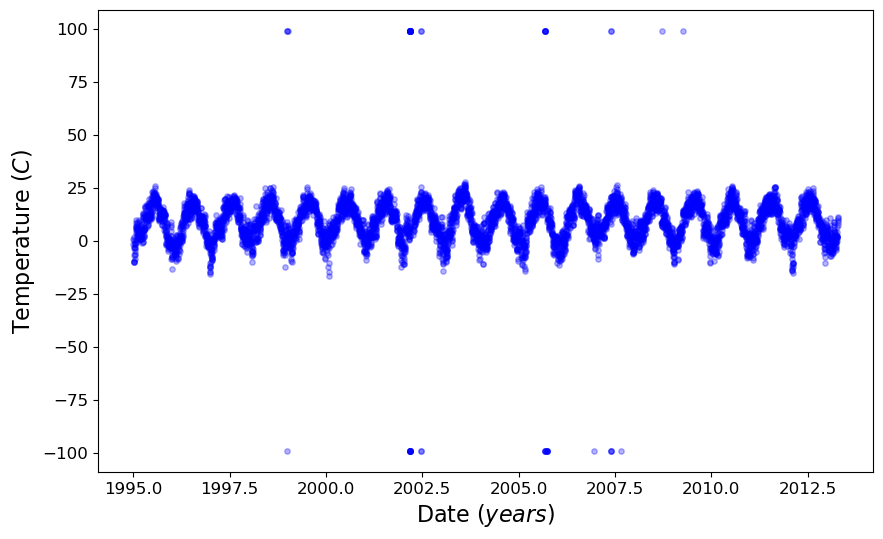

In [67]:
# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures_average_with_bad_data.txt")
Date = data[:,0]
Temp = data[:,1] 

# PLOT TO VERIFY FILE READ 
# This creates a figure object and sets the size
fig1 = plt.figure(figsize=(10,6))
# This allows subplots, for now this is set to 1 plot (1x1, plot 1)
ax1 = fig1.add_subplot(111)

# This makes a scatter plot of the data (typically what is used in science data)
ax1.scatter(Date,Temp,s=15,c='b',alpha=0.3)

# add the labels
ax1.set_xlabel("Date $(years)$",size=16)   # allows LaTeX style formating
ax1.set_ylabel("Temperature $(C)$",size=16)   # allows LaTeX style formating

# This increases the size of the labels to make them bigger
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)
plt.show()

We can limit the range to make sure we are seeing the individual data points

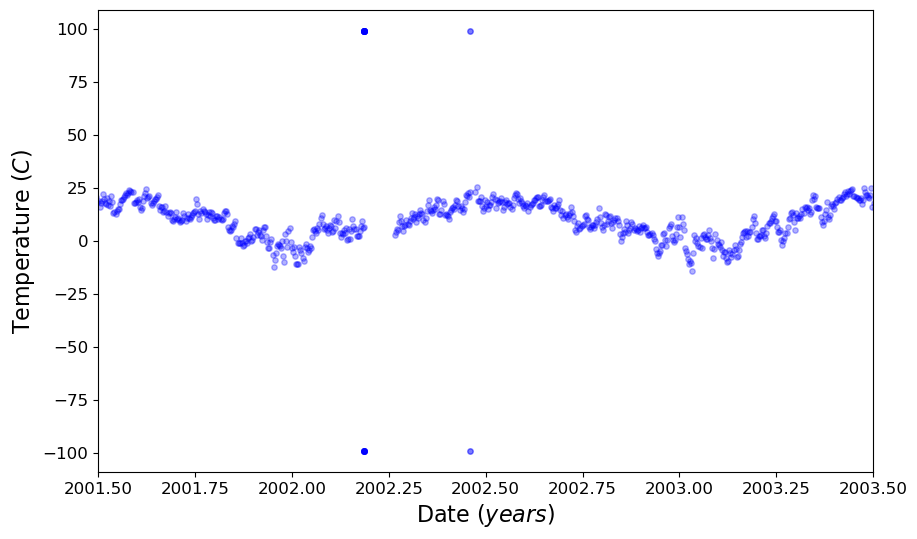

In [68]:
# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures_average_with_bad_data.txt")
Date = data[:,0]
Temp = data[:,1] 

# PLOT TO VERIFY FILE READ 
# This creates a figure object and sets the size
fig1 = plt.figure(figsize=(10,6))
# This allows subplots, for now this is set to 1 plot (1x1, plot 1)
ax1 = fig1.add_subplot(111)

# This makes a scatter plot of the data (typically what is used in science data)
ax1.scatter(Date,Temp,s=15,c='b',alpha=0.3)

# add the labels
ax1.set_xlabel("Date $(years)$",size=16)   # allows LaTeX style formating
ax1.set_ylabel("Temperature $(C)$",size=16)   # allows LaTeX style formating

# This increases the size of the labels to make them bigger
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=12)

# LIMIT TO 1.5 YEARS
ax1.set_xlim(2001.5,2003.5)
plt.show()

## Exercise 3

Now remake the plot using the 'masked' (above) data to remove the bad data points.  

NOTE the change in the scale of the Y-axis SHOULD change.

In [ ]:
#code here